In [1]:
import cv2 as cv
import numpy as np
import glob
import random
from removeFrame import removeFrame
from PIL import Image
from matplotlib import pyplot as plt

In [5]:
# Replace 'path' and give a fraction as 'sample'
path = glob.glob(r"C:\Users\johan\OneDrive\Skrivbord\masked images examples\img\*.png")
path = glob.glob(r"C:\Users\johan\OneDrive\Skrivbord\Images\Images\*.jpg")
sample = 0.02 # fraction of all pictures being sampled
size = (2560, 2560) # New size of all pictures - choosen arbitrary


# Samples pictures from the folder
# Uses removeFrame, then coverts to a PIL Image (just for easy resizing) and saves all images in a single vector
path = random.sample(path, int(np.ceil(sample*int(np.size(path))))) 
img_vec = np.empty([size[0],size[1],1])
for i in path:
    print('Loading: ' + i)
    #n = cv.imread(i,0) # Reads an image, 2nd argument = 0 => grayscale
    #n = Image.open(i).convert('L') # Reads and convert('L') => grayscale
    n = removeFrame(i)
    n = Image.fromarray(n).convert('L') # Reads and convert('L') => grayscale
    print(np.shape(n))
    n = n.resize(size)
    n = np.asarray(n)
    n = n[..., np.newaxis]
    img_vec = np.concatenate((img_vec,n),axis=2)
img_vec = img_vec[:,:,1:] # Removes "first imgae" = empty vector
print('Shape of img_vec: ' + str(np.shape(img_vec)))

Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_20221028_161337.jpg
(2323, 2372)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_20221028_155835.jpg
(2306, 2292)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_0182.JPG
(4843, 4000)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_0216.JPG
(3820, 3674)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_6520.jpg
(3360, 3381)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_0211.JPG
(3512, 3615)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_0162.JPG
(3500, 3498)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_20221101_130806.jpg
(3648, 2736)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_6698.jpg
(3477, 3449)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_20221101_124950.jpg
(2492, 2501)
Loading: C:\Users\johan\OneDrive\Skrivbord\Images\Images\IMG_0198.JPG
(3722, 3821)
Loading: C:\Users\johan\OneDrive\Skrivbord\

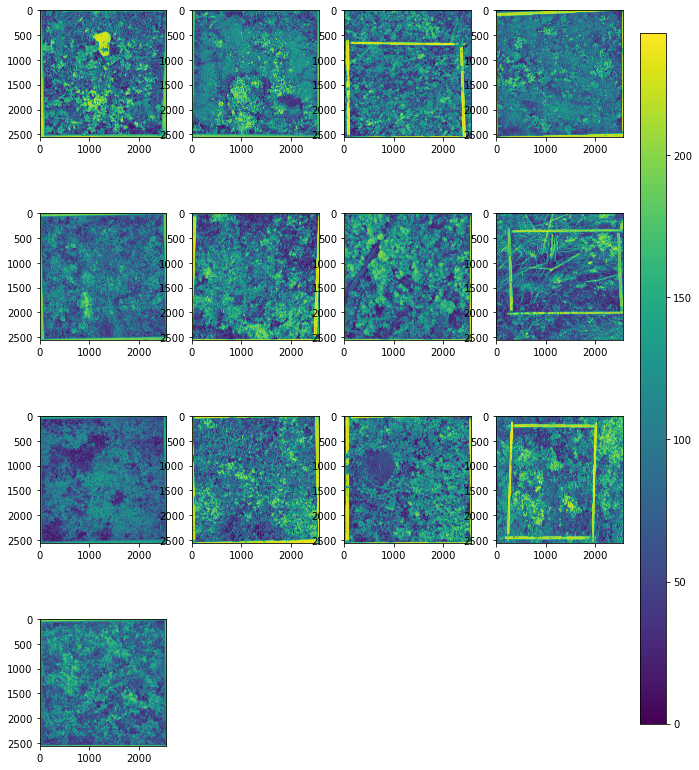

In [6]:
# Plot first images, maximum 36
n = np.size(img_vec[0,0,:]) # number of images in vector
if n > 36:
    n = 36
grid_size = int(np.ceil(np.sqrt(n)))
fig = plt.figure(figsize=(grid_size,grid_size))
for i in range(n): # 1 run for each image in the image vector
    fig.add_subplot(grid_size,grid_size, i+1)
    plt.imshow(img_vec[:,:,i])
fig.set_figheight(12)
fig.set_figwidth(12)
plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
cax = plt.axes([0.82, 0.1, 0.03, 0.80])
plt.colorbar(cax=cax)
plt.show()

In [7]:
#fig.savefig('Tester_med_ram.jpg')